## Latent Semantic Analysis / Indexing (LSA/LSI)

### (A) Pre-processing


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', -1)
path = "/content/gdrive/My Drive/data/gensim"
train = pd.read_csv(path + "/ag_news_train.csv")

<ipython-input-2-ff92c4043bad>:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
train.groupby('Class Index').head(2)

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again."
1,3,Carlyle Looks Toward Commercial Aerospace (Reuters),"Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market."
78,4,"'Madden,' 'ESPN' Football Score in Different Ways (Reuters)","Reuters - Was absenteeism a little high\on Tuesday among the guys at the office? EA Sports would like\to think it was because ""Madden NFL 2005"" came out that day,\and some fans of the football simulation are rabid enough to\take a sick day to play it."
79,4,Group to Propose New High-Speed Wireless Format (Reuters),"Reuters - A group of technology companies\including Texas Instruments Inc. (TXN.N), STMicroelectronics\(STM.PA) and Broadcom Corp. (BRCM.O), on Thursday said they\will propose a new wireless networking standard up to 10 times\the speed of the current generation."
448,2,"Phelps, Thorpe Advance in 200 Freestyle (AP)","AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenband and teammate Klete Keller were faster than the teenager in the 200 free preliminaries."
449,2,Reds Knock Padres Out of Wild-Card Lead (AP),"AP - Wily Mo Pena homered twice and drove in four runs, helping the Cincinnati Reds beat the San Diego Padres 11-5 on Saturday night. San Diego was knocked out of a share of the NL wild-card lead with the loss and Chicago's victory over Los Angeles earlier in the day."
492,1,Venezuelans Vote Early in Referendum on Chavez Rule (Reuters),Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.
493,1,S.Koreans Clash with Police on Iraq Troop Dispatch (Reuters),"Reuters - South Korean police used water cannon in\central Seoul Sunday to disperse at least 7,000 protesters\urging the government to reverse a controversial decision to\send more troops to Iraq."


In [4]:
from gensim.parsing.preprocessing import preprocess_string
text_tokenized = []
for doc in train['Description']:
   k = preprocess_string(doc)
   text_tokenized.append(k)

In [5]:
text_tokenized[0:3]

[['reuter',
  'short',
  'seller',
  'wall',
  'street',
  'dwindl',
  'band',
  'ultra',
  'cynic',
  'see',
  'green'],
 ['reuter',
  'privat',
  'invest',
  'firm',
  'carlyl',
  'group',
  'reput',
  'make',
  'time',
  'occasion',
  'controversi',
  'plai',
  'defens',
  'industri',
  'quietli',
  'place',
  'bet',
  'market'],
 ['reuter',
  'soar',
  'crude',
  'price',
  'plu',
  'worri',
  'economi',
  'outlook',
  'earn',
  'expect',
  'hang',
  'stock',
  'market',
  'week',
  'depth',
  'summer',
  'doldrum']]

- Remember to re-use the code from Chapter 2. Do not re-invent the wheel.
- Get the Dictionary, BoW, and word IDs

In [6]:
from gensim.corpora import Dictionary
gensim_dictionary = Dictionary()
bow_corpus = [gensim_dictionary.doc2bow(doc, allow_update=True) for doc in text_tokenized]
print(bow_corpus[:2])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)], [(4, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1)]]


In [7]:
id_words = [[(gensim_dictionary[id], count) for id, count in line] for line in bow_corpus[:2]]
print(id_words)

[[('band', 1), ('cynic', 1), ('dwindl', 1), ('green', 1), ('reuter', 1), ('see', 1), ('seller', 1), ('short', 1), ('street', 1), ('ultra', 1), ('wall', 1)], [('reuter', 1), ('bet', 1), ('carlyl', 1), ('controversi', 1), ('defens', 1), ('firm', 1), ('group', 1), ('industri', 1), ('invest', 1), ('make', 1), ('market', 1), ('occasion', 1), ('place', 1), ('plai', 1), ('privat', 1), ('quietli', 1), ('reput', 1), ('time', 1)]]


* Get the number of unique words

In [8]:
len(gensim_dictionary)

40359

* Print out the first ten words

In [9]:
for i in range(0,10):
    print(gensim_dictionary[i])

band
cynic
dwindl
green
reuter
see
seller
short
street
ultra


- Print out the word id

In [10]:
print(id_words[:2])

[[('band', 1), ('cynic', 1), ('dwindl', 1), ('green', 1), ('reuter', 1), ('see', 1), ('seller', 1), ('short', 1), ('street', 1), ('ultra', 1), ('wall', 1)], [('reuter', 1), ('bet', 1), ('carlyl', 1), ('controversi', 1), ('defens', 1), ('firm', 1), ('group', 1), ('industri', 1), ('invest', 1), ('make', 1), ('market', 1), ('occasion', 1), ('place', 1), ('plai', 1), ('privat', 1), ('quietli', 1), ('reput', 1), ('time', 1)]]


- Get the IF-IDF from BoW

In [11]:
from gensim.models import TfidfModel, LsiModel
tfidf = TfidfModel(bow_corpus) #, smartirs=’npu’)
tfidf_corpus = tfidf[bow_corpus]

### (B) Save the dictionary and BoW

In [ ]:
# You can use pickle to save the Bow and TF-IDF objects
import pickle
file = open(path + "/BoW_AGnews_corpus.pkl", 'wb')
pickle.dump(bow_corpus, file)
file.close()

In [ ]:
# You can use pickle to save the Bow and TF-IDF objects
import pickle
file = open(path + "/tfidf_AGnews_corpus.pkl", 'wb')
pickle.dump(tfidf_corpus, file)
file.close()

In [ ]:
from gensim.test.utils import datapath
dict_file = datapath(path + "/gensim_dictionary_AGnews")
gensim_dictionary.save(dict_file)

In [ ]:
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [ ]:
tfidf_corpus[0]

[(0, 0.31131789293821843),
 (1, 0.4306576644817018),
 (2, 0.39144503569676475),
 (3, 0.25087248536149226),
 (4, 0.10666451562874406),
 (5, 0.2939623618474953),
 (6, 0.3458751838128159),
 (7, 0.24562166453092021),
 (8, 0.20737140164598147),
 (9, 0.3634357292694977),
 (10, 0.22047599462197287)]

In [ ]:
id_words[0:3]

[[('band', 1),
  ('cynic', 1),
  ('dwindl', 1),
  ('green', 1),
  ('reuter', 1),
  ('see', 1),
  ('seller', 1),
  ('short', 1),
  ('street', 1),
  ('ultra', 1),
  ('wall', 1)],
 [('reuter', 1),
  ('bet', 1),
  ('carlyl', 1),
  ('controversi', 1),
  ('defens', 1),
  ('firm', 1),
  ('group', 1),
  ('industri', 1),
  ('invest', 1),
  ('make', 1),
  ('market', 1),
  ('occasion', 1),
  ('place', 1),
  ('plai', 1),
  ('privat', 1),
  ('quietli', 1),
  ('reput', 1),
  ('time', 1)],
 [('reuter', 1),
  ('market', 1),
  ('crude', 1),
  ('depth', 1),
  ('doldrum', 1),
  ('earn', 1),
  ('economi', 1),
  ('expect', 1),
  ('hang', 1),
  ('outlook', 1),
  ('plu', 1),
  ('price', 1),
  ('soar', 1),
  ('stock', 1),
  ('summer', 1),
  ('week', 1),
  ('worri', 1)]]

### (C) Model
#### (C.1) Modeling with BoW corpus

In [12]:
import gensim
lsi_model = gensim.models.lsimodel.LsiModel(
   corpus=bow_corpus,
   id2word=gensim_dictionary,
   num_topics=20
)

In [13]:
lsi_model.save(path + "/ag_news_lsi_model")

In [14]:
import pprint as pp
pp.pprint(lsi_model.print_topics())

[(0,
  '0.427*"reuter" + 0.347*"new" + 0.284*"said" + 0.265*"fullquot" + '
  '0.198*"stock" + 0.161*"investor" + 0.156*"york" + 0.155*"com" + '
  '0.151*"http" + 0.148*"www"'),
 (1,
  '-0.336*"fullquot" + 0.300*"said" + 0.288*"quot" + -0.234*"reuter" + '
  '0.230*"new" + -0.185*"stock" + -0.176*"http" + 0.175*"year" + -0.174*"href" '
  '+ -0.174*"www"'),
 (2,
  '0.754*"new" + -0.436*"said" + -0.265*"quot" + 0.254*"york" + '
  '-0.106*"reuter" + -0.070*"fullquot" + -0.066*"offici" + -0.061*"kill" + '
  '-0.051*"iraq" + -0.045*"unit"'),
 (3,
  '0.898*"quot" + -0.234*"said" + -0.122*"year" + 0.111*"new" + '
  '0.084*"fullquot" + -0.074*"reuter" + -0.058*"offici" + -0.057*"kill" + '
  '0.050*"research" + -0.049*"wednesdai"'),
 (4,
  '0.645*"year" + -0.474*"said" + -0.272*"new" + 0.151*"game" + 0.125*"world" '
  '+ 0.095*"time" + 0.092*"season" + 0.085*"win" + -0.082*"york" + '
  '0.075*"million"'),
 (5,
  '0.519*"compani" + -0.199*"game" + -0.192*"reuter" + 0.170*"corp" + '
  '0.150*"softw

#### (C.2) Modeling with the TF-IDF corpus

In [15]:
import gensim
lsi_model = gensim.models.lsimodel.LsiModel(
   corpus=tfidf_corpus,
   id2word=gensim_dictionary,
   num_topics=20
)

In [16]:
import pprint as pp
pp.pprint(lsi_model.print_topics())

[(0,
  '0.200*"reuter" + 0.184*"new" + 0.177*"said" + 0.133*"quot" + 0.130*"year" + '
  '0.126*"compani" + 0.125*"stock" + 0.122*"fullquot" + 0.118*"oil" + '
  '0.116*"york"'),
 (1,
  '-0.417*"fullquot" + -0.251*"stock" + -0.216*"investor" + -0.212*"reuter" + '
  '-0.211*"http" + -0.211*"href" + -0.210*"www" + -0.209*"quickinfo" + '
  '-0.209*"aspx" + -0.205*"ticker"'),
 (2,
  '-0.230*"kill" + -0.184*"fullquot" + -0.177*"iraq" + -0.159*"baghdad" + '
  '0.147*"compani" + -0.145*"iraqi" + -0.143*"reuter" + -0.127*"palestinian" + '
  '-0.126*"peopl" + -0.125*"bomb"'),
 (3,
  '-0.424*"oil" + 0.361*"quot" + -0.327*"price" + -0.165*"crude" + '
  '0.161*"fullquot" + -0.141*"barrel" + 0.134*"microsoft" + 0.119*"softwar" + '
  '-0.104*"record" + -0.103*"suppli"'),
 (4,
  '0.266*"game" + 0.182*"win" + 0.164*"season" + -0.155*"quot" + 0.153*"leagu" '
  '+ 0.151*"night" + 0.144*"victori" + 0.142*"team" + -0.126*"said" + '
  '0.126*"seri"'),
 (5,
  '-0.843*"quot" + -0.129*"oil" + 0.115*"softwar" + 

### (D) Use coherence score to determine the optimal number of topics

In [18]:
import gensim
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
np.random.seed(42)
def coherence_UMass(corpus, dictionary, k):
   lsi_model = gensim.models.lsimodel.LsiModel(corpus=tfidf_corpus,num_topics=k)
   coherence = CoherenceModel(model=lsi_model,
                              corpus=corpus,
                              dictionary=dictionary,
                              coherence='u_mass')
   return coherence.get_coherence()

coherenceList_UMass = []
numTopicsList = [100,150,200,250]
for k in numTopicsList:
   c_UMass = coherence_UMass(tfidf_corpus, id_words, k)
   coherenceList_UMass.append(c_UMass)

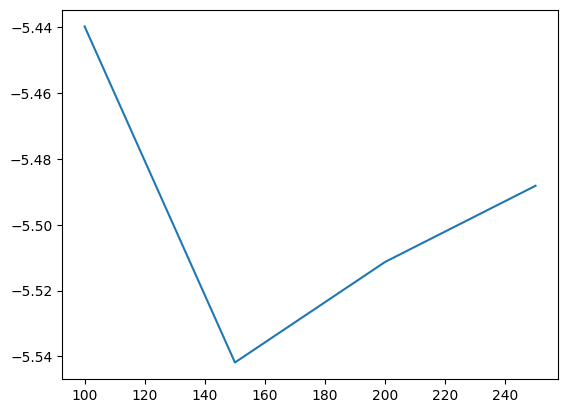

In [19]:
from matplotlib import pyplot as plt
plt.plot([100,150,200,250], coherenceList_UMass)
plt.savefig(path + "/ag_news_lsi_coherence")
plt.show()

- Save the model. The optimal number of 150

In [20]:
import gensim
lsi_model = gensim.models.lsimodel.LsiModel(
   corpus=tfidf_corpus,
   id2word=gensim_dictionary,
   num_topics=150
)
lsi_model.save(path + "/ag_news_lsi_model")

### (E) Understand the model

In [21]:
lsi_model.get_topics()[0:2]

array([[ 3.02516097e-03,  2.67193609e-04,  9.96747600e-04, ...,
         1.09561420e-04,  2.80205297e-05,  3.34169248e-05],
       [ 1.58237963e-03,  1.77632950e-04, -6.09622780e-05, ...,
         1.82242481e-05,  1.34136674e-05,  2.50903508e-05]])

In [22]:
len(lsi_model.get_topics())

150

In [23]:
len(lsi_model.get_topics()[2])

40359

In [24]:
lsi_model.show_topics()[0:3]

[(0,
  '0.199*"reuter" + 0.185*"new" + 0.178*"said" + 0.132*"quot" + 0.131*"year" + 0.126*"compani" + 0.125*"stock" + 0.122*"fullquot" + 0.119*"oil" + 0.116*"york"'),
 (1,
  '-0.415*"fullquot" + -0.250*"stock" + -0.215*"investor" + -0.210*"reuter" + -0.210*"http" + -0.209*"href" + -0.208*"www" + -0.207*"quickinfo" + -0.207*"aspx" + -0.203*"ticker"'),
 (2,
  '-0.236*"kill" + -0.186*"fullquot" + -0.174*"iraq" + -0.161*"baghdad" + 0.150*"compani" + -0.148*"iraqi" + -0.145*"reuter" + -0.131*"palestinian" + -0.128*"bomb" + -0.125*"peopl"')]

In [25]:
i = 45
train['Description'][i]

"A lawsuit against Gary Winnick, the former chief of Global Crossing, refocuses attention on what Mr. Winnick knew about his company's finances as it imploded."

In [26]:
bow_corpus[i]

[(93, 1),
 (206, 1),
 (513, 1),
 (514, 1),
 (515, 1),
 (516, 1),
 (517, 1),
 (518, 1),
 (519, 1),
 (520, 1),
 (521, 1),
 (522, 2)]

In [27]:
id_words = [[(gensim_dictionary[id], count) for id, count in line] for line in bow_corpus[i:(i+1)]]
pp.pprint(id_words)

[[('compani', 1),
  ('financ', 1),
  ('attent', 1),
  ('chief', 1),
  ('cross', 1),
  ('gari', 1),
  ('global', 1),
  ('implod', 1),
  ('knew', 1),
  ('lawsuit', 1),
  ('refocus', 1),
  ('winnick', 2)]]


In [28]:
tfidf_corpus[i]

[(93, 0.09256640306973117),
 (206, 0.1824096655332926),
 (513, 0.22115919307277485),
 (514, 0.14015129409880323),
 (515, 0.20612060750761854),
 (516, 0.22262657288143822),
 (517, 0.15833380233728434),
 (518, 0.35453549783337673),
 (519, 0.23179498753912278),
 (520, 0.1802823632220798),
 (521, 0.35453549783337673),
 (522, 0.6594429672721119)]

In [29]:
a_doc = lsi_model[tfidf_corpus[i]]
print(len(a_doc))

150


In [30]:
a_doc

[(0, 0.032235633611657176),
 (1, 0.007102851856500203),
 (2, 0.01823901613759617),
 (3, 0.01293608368709607),
 (4, -0.015586638987351742),
 (5, 0.01172555382879074),
 (6, -0.014404458690462415),
 (7, 0.002127472589315075),
 (8, -0.00710606376912141),
 (9, -0.021517190635985062),
 (10, 0.01044553445335182),
 (11, -0.030368162482686752),
 (12, 0.017059072244528253),
 (13, 0.004335398052669905),
 (14, 0.013713309219801512),
 (15, 0.01623367521588988),
 (16, 0.007310854187530433),
 (17, 0.0072275320629329115),
 (18, -0.0007518609472303345),
 (19, -0.010417917076052625),
 (20, 0.0004589625345029261),
 (21, 0.02184753317808688),
 (22, -0.010527679703840819),
 (23, -0.01889460301225522),
 (24, 0.0395360188741617),
 (25, 0.008410973049026335),
 (26, 0.020122424322414147),
 (27, 0.017347990939004413),
 (28, 0.035250391410318146),
 (29, -0.0352628627942808),
 (30, -0.020172887346127044),
 (31, -0.011159905535055012),
 (32, 0.023939362736384674),
 (33, 0.01844527264337699),
 (34, -0.0017645896234

In [31]:
import pprint as pp
a_doc.sort(key=lambda a: a[1], reverse=True)
pp.pprint(a_doc[0:5])

[(24, 0.0395360188741617),
 (28, 0.035250391410318146),
 (0, 0.032235633611657176),
 (58, 0.027743926175049106),
 (52, 0.02726986059345902)]


In [32]:
lsi_model.show_topics()[28]

(28,
 '-0.272*"year" + 0.212*"compani" + 0.165*"game" + -0.164*"nuclear" + -0.145*"internet" + 0.138*"market" + -0.131*"iran" + 0.123*"stock" + 0.121*"tokyo" + 0.115*"nation"')

In [33]:
lsi_model.show_topics()[53]

(53,
 '0.307*"time" + 0.219*"group" + 0.195*"wednesdai" + -0.175*"fridai" + -0.174*"drug" + 0.174*"thursdai" + -0.167*"arafat" + -0.146*"offici" + -0.146*"yasser" + -0.142*"mondai"')

### (E) Use the model in production

In [34]:
import gensim
lsi_model = gensim.models.lsimodel.LsiModel.load(path + "/ag_news_lsi_model")

In [ ]:
from gensim.corpora import Dictionary
from gensim.test.utils import datapath
dict_file = datapath(path + "/gensim_dictionary_AGnews")
gensim_dictionary = Dictionary.load(dict_file)

In [ ]:
import pickle
# open a file, where you stored the pickled data
file = open(path + "gensim/BoW_AGnews_corpus.pkl", 'rb')
bow_corpus = pickle.load(file)
# close the file
file.close()
bow_corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1)]

In [ ]:
import pickle
# open a file, where you stored the pickled data
file = open(path + "/tfidf_AGnews_corpus.pkl", 'rb')
tfidf_corpus = pickle.load(file)
# close the file
file.close()
tfidf_corpus[0]

[(0, 0.31131789293821843),
 (1, 0.4306576644817018),
 (2, 0.39144503569676475),
 (3, 0.25087248536149226),
 (4, 0.10666451562874406),
 (5, 0.2939623618474953),
 (6, 0.3458751838128159),
 (7, 0.24562166453092021),
 (8, 0.20737140164598147),
 (9, 0.3634357292694977),
 (10, 0.22047599462197287)]

In [ ]:
from gensim.parsing.preprocessing import preprocess_string
doc = "Crude prices inflation the economy outlook earnings"
doc_tokenized = preprocess_string(doc)
doc_tokenized

['crude', 'price', 'inflat', 'economi', 'outlook', 'earn']

In [ ]:
vec_bow = gensim_dictionary.doc2bow(doc_tokenized)
vec_bow

[(28, 1), (31, 1), (32, 1), (35, 1), (37, 1), (2099, 1)]

In [ ]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bow_corpus)
vec_tfidf = tfidf[vec_bow]
vec_tfidf

[(28, 0.413722234207753),
 (31, 0.36285954267555626),
 (32, 0.3916480509570918),
 (35, 0.4699070384454736),
 (37, 0.2806698374889378),
 (2099, 0.49415633855722196)]

In [ ]:
vec_lsi = lsi_model[vec_tfidf]
print(len(vec_lsi))

150


In [ ]:
vec_lsi[0:5]

[(0, 0.0942167351687923),
 (1, -0.05642261154087168),
 (2, 0.07324164759330441),
 (3, -0.21816624925484687),
 (4, -0.0456915079703938)]

In [ ]:
from gensim import similarities
index = similarities.MatrixSimilarity(lsi_model[tfidf_corpus])

In [ ]:
import pprint as pp
sims = index[vec_lsi]  # perform a similarity query against the corpus
sims
#pp.pprint(list(enumerate(sims))[0:10])  # print (document_number, document_similarity) 2-tuples

array([ 0.15549277, -0.08580323,  0.6605106 , ...,  0.01350161,
       -0.02669507, -0.06476542], dtype=float32)

In [ ]:
len(sims)

120000

In [ ]:
my_outcome = list(enumerate(sims))

In [ ]:
my_outcome.sort(key=lambda a: a[1], reverse=True)
pp.pprint(my_outcome[0:10])

[(93167, 0.78405493),
 (24164, 0.78052753),
 (20267, 0.7723593),
 (68823, 0.76993084),
 (5313, 0.76508605),
 (7198, 0.7607913),
 (44747, 0.758785),
 (66982, 0.74543446),
 (61143, 0.74483055),
 (24636, 0.73511076)]


In [ ]:
train['Description'][93167]

'A huge jump in wholesale prices sent stocks falling yesterday as investors worried that rising oil prices were taking a toll on the overall economy.'

In [ ]:
train['Description'][24164]

'A sharp decline in oil prices and a surprise drop in wholesale prices pushed stocks higher Friday as investors #39; concerns about third quarter earnings were mitigated.'

In [ ]:
train['Description'][20267]

'In a bid to relieve Western economies of the unprecedented rise in oil prices, Saudi Arabia has slashed prices for its crude sales for October.'

In [ ]:
train['Description'][68823]

'US Treasury debt prices eased on Friday as a dearth of economic indicators led investors to ponder the impact of high oil prices on the economy and interest rates.'